In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import platform
import os
import multiprocessing
import datetime

%matplotlib inline

In [2]:
print "Version:", platform.platform()
print "CPU cores:", multiprocessing.cpu_count()
print "Page size:", os.sysconf('SC_PAGE_SIZE')
print "Current time:", datetime.datetime.now()

Version: Darwin-14.5.0-x86_64-i386-64bit
CPU cores: 8
Page size: 4096
Current time: 2016-05-16 20:01:21.318949


# Parallel test results.
Value - amount of tests passed.

In [3]:
data = pd.read_csv("par_test_results.txt", sep=' ', header=None, names=["lib", 'test', 'test_name', 'nth', 'time'])

In [4]:
data["testid"] = data.pop("test") + "_" + data.pop("test_name")
data = data.reindex_axis(sorted(data.columns), axis=1)
tests = sorted(list(set(data['testid'].tolist())))
libs = sorted(list(set(data['lib'].tolist())))

In [5]:
ranks = pd.DataFrame(index=libs, columns=tests).fillna(0)

datarank = data[['lib', 'testid', 'time']]
for test in tests:
    testf = datarank[datarank.testid == test]
    for index, row in testf.iterrows():
        if row.time != -1:     
            ranks.set_value(row['lib'], row['testid'], ranks.loc[row['lib']][row['testid']] + 1)
            if row["lib"] == "dokhlopkov":
                ranks.set_value(row['lib'], row['testid'], ranks.loc[row['lib']][row['testid']] + 1)

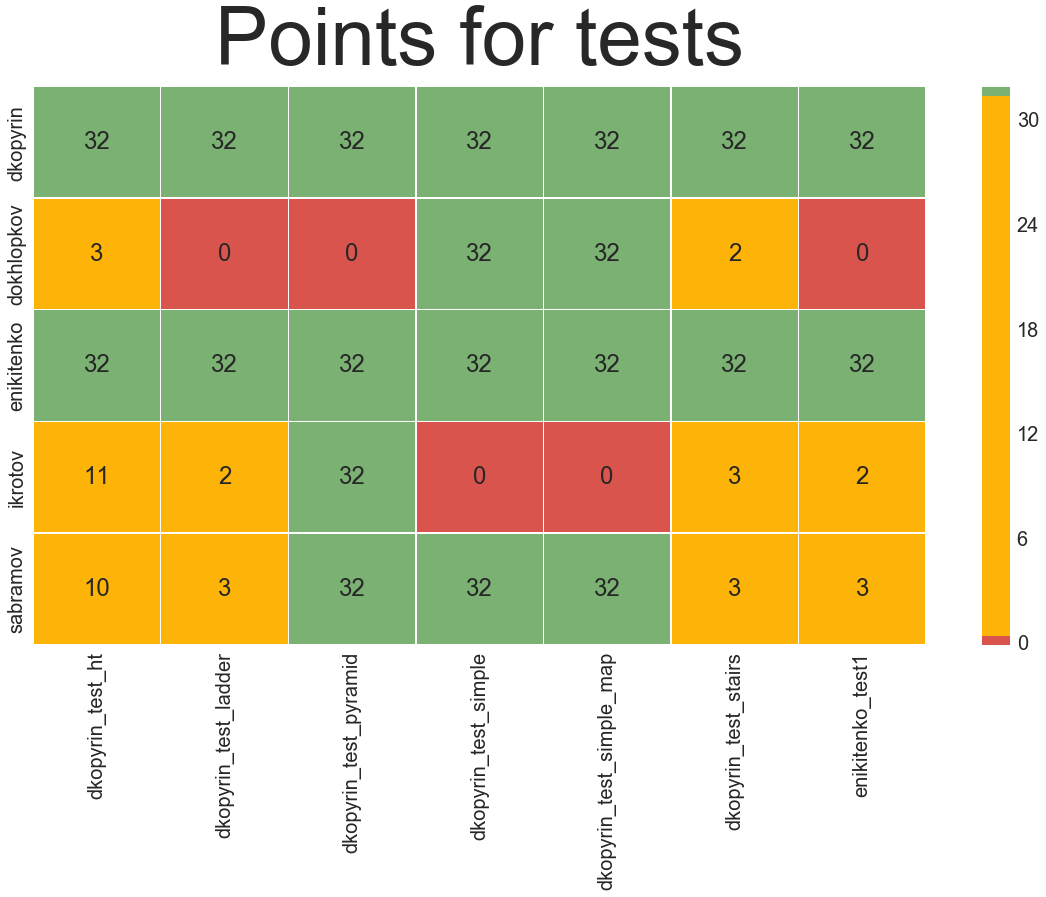

In [6]:
colors = ["pale red"] + ["amber"] * 62 + ["faded green"]
cmap = matplotlib.colors.ListedColormap(sns.xkcd_palette(colors))

sns.set(font_scale=2)
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
sns.plt.title("Points for tests", fontsize=80, y=1.03)
sns.heatmap(ranks, annot=True, cmap=cmap, linewidths=.5)
plt.show()

## Plotting graphs
based on times and threads

ImportError: No module named statsmodels.genmod.generalized_linear_model

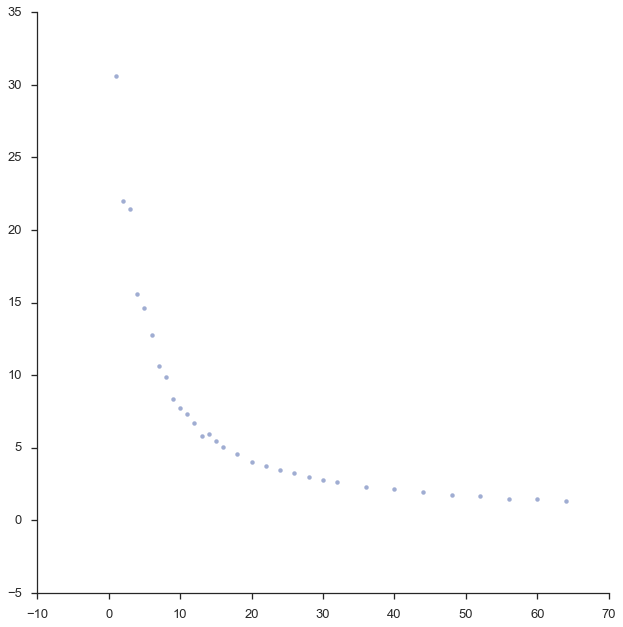

In [7]:
passed_data = (data[data["time"] != -1]).copy()
passed_data["1/time"] = passed_data["time"].apply(lambda x: 1/x)

sns.set(style="ticks", context="talk", font_scale=1)
for test in tests:
    test_data = passed_data[passed_data.testid == test]
    pal = sns.cubehelix_palette(4, 1.5, .75, light=.6, dark=.2)
    g = sns.lmplot(x="nth", y="1/time", hue="lib", data=test_data, palette=pal, size=9, logistic=True)
    plt.title(test, fontsize=40)
    g.set_axis_labels("Number of threads", "1 / Time")
    plt.show()

In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>

<footer id="attribution" style="float:right; color:#999; background:#fff;">
Created with Jupyter by dokhlopkov.
</footer>''')